In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns
sns.set(style='white')
    
data = pd.concat([pd.read_json(f, lines=True) for f in glob.glob("../data/houses*.jl")])
data = data.drop(columns=["adaugat_la", "Compartimentare", "text"])
data["nr_anunt"] = data["nr_anunt"].map(lambda x: x[0] if type(x) == list else x)

data.set_index('nr_anunt', inplace=True)

data['CohortGroup'] = data.groupby(level=0)['date'].min()
data.reset_index(inplace=True)
data.head()

,nr_anunt,An constructie,Camere,Etaj,Locuinta mobilata / utilata,Oferit de,Suprafata utila,date,price,title,type,url,CohortGroup
0,95712824,NaN,3 camere,NaN,NaN,Agentie,110 m²,2018-03-15,83000€,Casa de vanzare central sau schimb cu apartame...,Case de vanzare Oradea,https://www.olx.ro/oferta/casa-de-vanzare-cent...,2018-02-14
1,138237577,1977 – 1990,NaN,8,NaN,Proprietar,70 m²,2018-03-15,65200€,"Apartament 3 camere vanzare, Nufarul zona Lotus",Apartamente - Garsoniere de vanzare Oradea,https://www.olx.ro/oferta/apartament-3-camere-...,2018-02-13
2,131080683,NaN,4 sau mai multe,NaN,Complet,Agentie,160 m²,2018-03-15,100000€,"Casa de vanzare Paleu, Oradea",Case de vanzare Oradea,https://www.olx.ro/oferta/casa-de-vanzare-pale...,2018-02-07
3,133540587,NaN,4 sau mai multe,NaN,NaN,Agentie,400 m²,2018-03-15,290000€,Casă / Vilă cu 9 camere,Case de vanzare Oradea,https://www.olx.ro/oferta/casa-vila-cu-9-camer...,2018-02-07
4,153445923,NaN,4 sau mai multe,NaN,Complet,Agentie,356 m²,2018-03-15,175000€,"De vanzare casa, Oradea semicentrala,V0455",Case de vanzare Oradea,https://www.olx.ro/oferta/de-vanzare-casa-orad...,2018-02-15


In [2]:
grouped = data.groupby(["CohortGroup", "date"])
cohorts = grouped.agg({'nr_anunt': pd.Series.nunique})

print(cohorts.head())

exp = pd.DataFrame(cohorts.to_records())

exp["CohortPeriod"] = exp["date"] - exp["CohortGroup"]
exp.set_index(["CohortGroup", "CohortPeriod"], inplace=True)
print(exp.head())
cohort_group_size = exp["nr_anunt"].groupby(level=0).first()
retention = exp["nr_anunt"].unstack(0).divide(cohort_group_size, axis=1)
print(retention.head())

                        nr_anunt
CohortGroup date                
2018-02-07  2018-02-07      2551
            2018-02-08      2461
            2018-02-09      2390
            2018-02-10      2345
            2018-02-11      2300
                               date  nr_anunt
CohortGroup CohortPeriod                     
2018-02-07  0 days       2018-02-07      2551
            1 days       2018-02-08      2461
            2 days       2018-02-09      2390
            3 days       2018-02-10      2345
            4 days       2018-02-11      2300
CohortGroup   2018-02-07  2018-02-08  2018-02-09  2018-02-10  2018-02-11  \
CohortPeriod                                                               
0 days          1.000000    1.000000    1.000000     1.00000    1.000000   
1 days          0.964720    0.921569    0.941176     1.00000    0.955882   
2 days          0.936887    0.901961    0.862745     0.93750    0.852941   
3 days          0.919247    0.901961    0.862745     0.90625    0.8

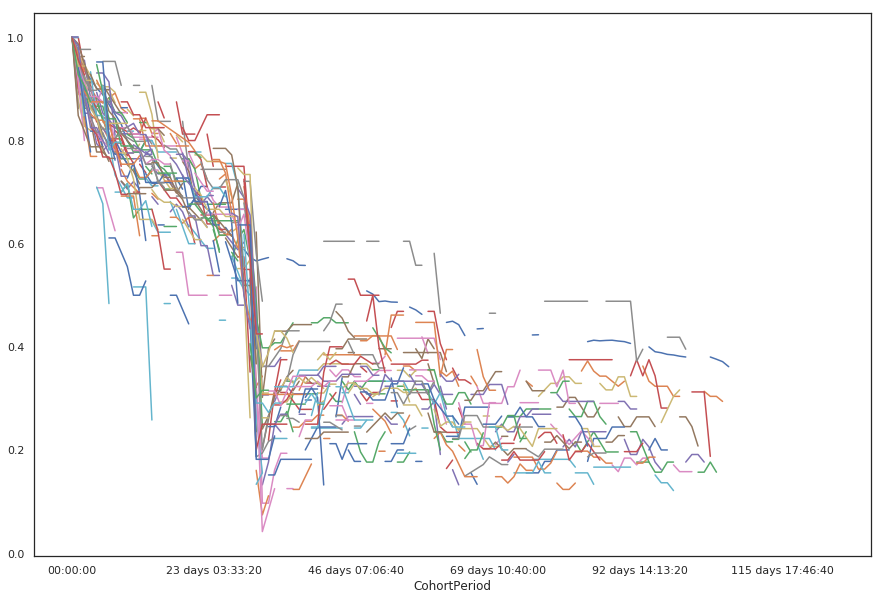

In [3]:
retention.plot(figsize=(15,10), legend=False)

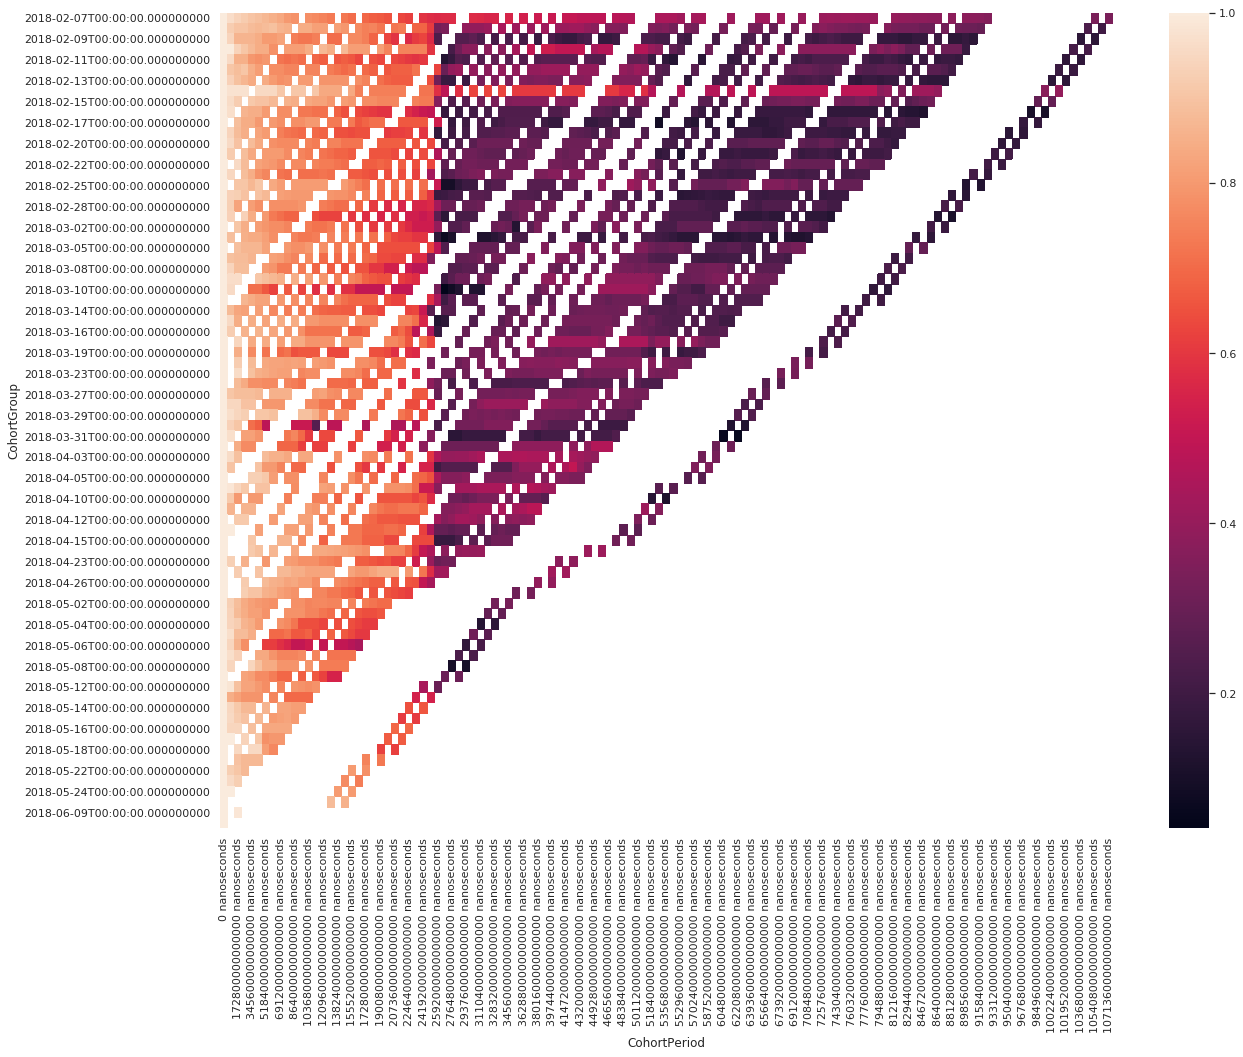

In [4]:
plt.figure(figsize=(20, 15))
sns.heatmap(retention.T, )